In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 11
plt.rc('font', family='Helvetica')

In [3]:
data = pd.read_csv("data/mspti_minipti_abs.csv")
data

,MSPTI,error_mspti,MiniPTI,error_minipti
0,1390.0,84.60,1090.0,263.0
1,1530.0,30.60,986.0,91.3
2,1560.0,22.50,1020.0,62.3
3,649.0,85.10,483.0,106.0
4,573.0,19.50,347.0,101.0
5,603.0,17.80,338.0,73.2
6,582.0,14.70,314.0,59.5
7,617.0,12.60,365.0,139.0
8,628.0,15.70,373.0,101.0
9,1300.0,111.00,944.0,214.0


In [4]:
result = stats.linregress(x=data["MSPTI"], y=data["MiniPTI"], alternative="greater")

In [5]:
intercept = result.intercept
intercept

-92.04457644720014

In [6]:
slope = result.slope
slope

0.6478711551934175

In [7]:
result.rvalue ** 2

0.9840276071602105

In [8]:
result.stderr

0.01155805898758368

In [9]:
intercept_stderr = result.intercept_stderr
intercept_stderr

28.46682166535347

In [10]:
absorption_estimated = intercept + slope * data["MSPTI"]

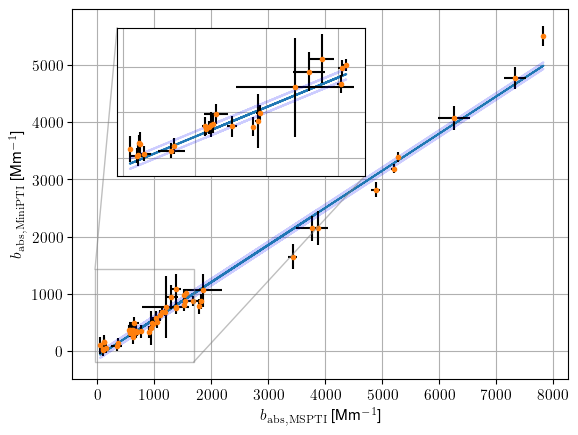

In [11]:
fig, ax = plt.subplots()

ax.plot(data["MSPTI"], absorption_estimated)
ax.errorbar(x=data["MSPTI"], y=data["MiniPTI"], xerr=data["error_mspti"], yerr=data["error_minipti"], ecolor="black", fmt=".")
ax.plot(data["MSPTI"], absorption_estimated  - 2 * intercept_stderr, color="b", alpha=0.2)
ax.plot(data["MSPTI"], absorption_estimated  + 2 * intercept_stderr, color="b", alpha=0.2)
ax.grid()

axins = ax.inset_axes([0.09, 0.55, 0.5, 0.4])
axins.plot(data["MSPTI"][:24], intercept + slope * data["MSPTI"][:24] + 0.5)
axins.errorbar(x=data["MSPTI"][:24], y=data["MiniPTI"][:24], xerr=data["error_mspti"][:24], yerr=data["error_minipti"][:24], ecolor="black", fmt=".",
               color="tab:orange")
axins.plot(data["MSPTI"][:24], absorption_estimated[:24]  - 2 * intercept_stderr, color="b", alpha=0.2, label="95 % Prediction Interval")
axins.plot(data["MSPTI"][:24], absorption_estimated[:24]  + 2 * intercept_stderr, color="b", alpha=0.2)

ax.set_xlabel(r"$b_{\mathrm{abs,MSPTI}}$ [Mm$^{-1}$]")
ax.set_ylabel(r"$b_{\mathrm{abs,MiniPTI}}$ [Mm$^{-1}$]")

for tick in axins.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in axins.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)


axins.grid()
ax.indicate_inset_zoom(axins)
plt.show()